_Sauer Numerical Analysis 2nd Edition pg. 317_

_https://gist.github.com/giuseppebonaccorso/60ce3eb3a829b94abf64ab2b7a56aaef_

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [2]:
# Set random seed (for reproducibility)
np.random.seed(1000)
# Start and end time (in milliseconds)
tmin = 0.0
tmax = 50.0
# Average potassium channel conductance per unit area (mS/cm^2)
gK = 36.0
# Average sodoum channel conductance per unit area (mS/cm^2)
gNa = 120.0
# Average leak channel conductance per unit area (mS/cm^2)
gL = 0.3
# Membrane capacitance per unit area (uF/cm^2)
Cm = 1.0
# Potassium potential (mV)
VK = -12.0
# Sodium potential (mV)
VNa = 115.0
# Leak potential (mV)
Vl = 10.613
# Time values
T = np.linspace(tmin, tmax, 10000)

In [3]:
# Potassium ion-channel rate functions
def alpha_n(Vm):
    return (0.01 * (10.0 - Vm)) / (np.exp(1.0 - (0.1 * Vm)) - 1.0)
def beta_n(Vm):
    return 0.125 * np.exp(-Vm / 80.0)

# Sodium ion-channel rate functions
def alpha_m(Vm):
    return (0.1 * (25.0 - Vm)) / (np.exp(2.5 - (0.1 * Vm)) - 1.0)
def beta_m(Vm):
    return 4.0 * np.exp(-Vm / 18.0)
def alpha_h(Vm):
    return 0.07 * np.exp(-Vm / 20.0)
def beta_h(Vm):
    return 1.0 / (np.exp(3.0 - (0.1 * Vm)) + 1.0)

In [4]:
# n, m, and h steady-state values
def n_inf(Vm=0.0):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))
def m_inf(Vm=0.0):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))
def h_inf(Vm=0.0):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))
  

In [5]:
# Input stimulus
def Id(t):
    if 0.0 < t < 1.0:
        return 150.0
    elif 10.0 < t < 11.0:
        return 50.0
    return 0.0

In [6]:
# Compute derivatives
def compute_derivatives(y, t0):
    dy = np.zeros((4,))
    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    
    # dVm/dt
    GK = (gK / Cm) * np.power(n, 4.0)
    GNa = (gNa / Cm) * np.power(m, 3.0) * h
    GL = gL / Cm
    dy[0] = (Id(t0) / Cm) - (GK * (Vm - VK)) - (GNa * (Vm - VNa)) - (GL * (Vm - Vl))
    
    # dn/dt
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)
    # dm/dt
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)
    # dh/dt
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)
    
    return dy

In [7]:
# State (Vm, n, m, h)
Y = np.array([0.0, n_inf(), m_inf(), h_inf()])

In [8]:
# Solve ODE system
# Vy = (Vm[t0:tmax], n[t0:tmax], m[t0:tmax], h[t0:tmax])
Vy = odeint(compute_derivatives, Y, T)

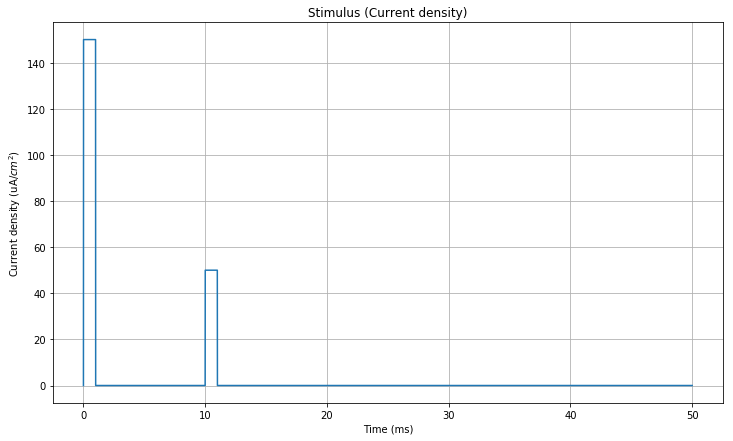

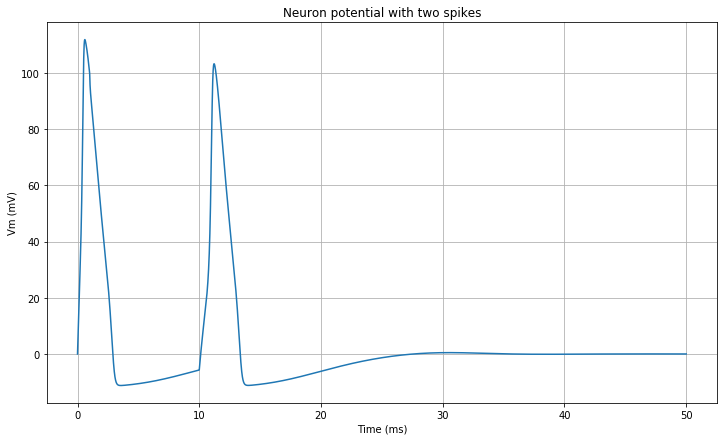

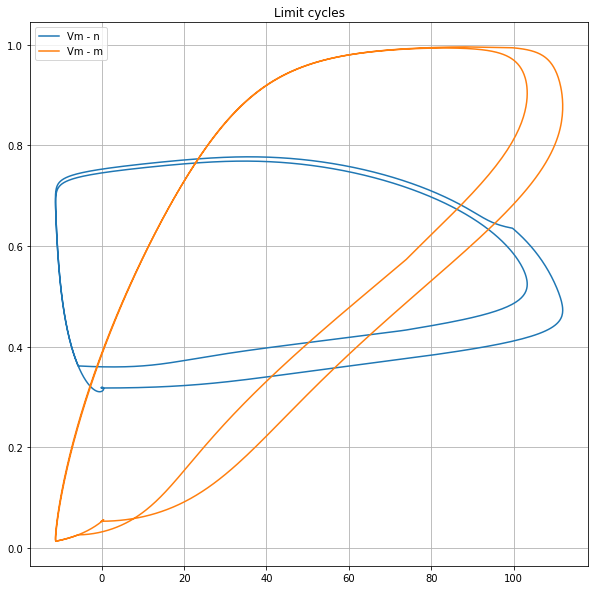

In [10]:
# Input stimulus
Idv = [Id(t) for t in T]

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(T, Idv)
ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'Current density (uA/$cm^2$)')
ax.set_title('Stimulus (Current density)')
plt.grid()

# Neuron potential
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(T, Vy[:, 0])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neuron potential with two spikes')
plt.grid()

# Trajectories with limit cycles
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(Vy[:, 0], Vy[:, 1], label='Vm - n')
ax.plot(Vy[:, 0], Vy[:, 2], label='Vm - m')
ax.set_title('Limit cycles')
ax.legend()
plt.grid()